# Check number of waters near Y501 in rest cache

In [1]:
import mdtraj as md
import numpy as np
import pickle
import os
from tqdm import tqdm_notebook
from simtk.openmm import app
from simtk.openmm import unit
import matplotlib.pyplot as plt
from pymbar import timeseries

In [51]:
def new_positions(hybrid_positions):
    n_atoms_new = htf._topology_proposal.n_atoms_new
    hybrid_indices = [htf._new_to_hybrid_map[idx] for idx in range(n_atoms_new)]
    return hybrid_positions[hybrid_indices, :]
    
def old_positions(hybrid_positions):
    n_atoms_old = htf._topology_proposal.n_atoms_old
    hybrid_indices = [htf._old_to_hybrid_map[idx] for idx in range(n_atoms_old)]
    return hybrid_positions[hybrid_indices, :]

def make_traj(outdir, htf, i, phase, name, endstate, is_old=True, keep_solvent=False):
    with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
        cache = np.load(f)
        
#     lengths = np.array([val[i].value_in_unit_system(unit.md_unit_system) for i, val in enumerate(htf.hybrid_system.getDefaultPeriodicBoxVectors())])
#     lengths = np.array([lengths], dtype=np.float64)
#     lengths = np.repeat(lengths, 100, axis=0)

#     angles = np.array([90, 90, 90])
#     angles = np.repeat(np.array([angles]), 100, axis=0)
        
    if is_old:
        old_pos = np.zeros(shape=(100, htf._topology_proposal.old_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            old_pos[j] = old_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(old_pos, md.Topology.from_openmm(htf._topology_proposal.old_topology))

#         traj = md.Trajectory(old_pos, md.Topology.from_openmm(htf._topology_proposal.old_topology), unitcell_lengths=lengths, unitcell_angles=angles)
    else:
        new_pos = np.zeros(shape=(100, htf._topology_proposal.new_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            new_pos[j] = new_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(new_pos, md.Topology.from_openmm(htf._topology_proposal.new_topology))

#         traj = md.Trajectory(new_pos, md.Topology.from_openmm(htf._topology_proposal.new_topology), unitcell_lengths=lengths, unitcell_angles=angles)
      

           
#     # Set unit cell vectors in traj 
#     traj.unitcell_vectors = box_vectors
#     print(type(traj.unitcell_vectors[0]))
#     traj.image_molecules(inplace=True)
    
#     if not keep_solvent:
#         traj = traj.remove_solvent(exclude=['Na+', 'Cl-'])
    
    return traj
       

## Y501 complex (15/149)

In [68]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/149/"
i = 149
phase = 'complex'
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))

In [69]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_solvent = make_traj(outdir, htf, i, phase, name, endstate, is_old, keep_solvent=True)

/scratch/lsftmp/3182888.tmpdir/ipykernel_40087/965879479.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [14]:
# traj_rest_solvent.save(os.path.join(outdir, f"{i}_{phase}_Y501_rest.dcd"))
# traj_rest_solvent[0].save(os.path.join(outdir, f"{i}_{phase}_Y501_rest.pdb"))

In [70]:
tyr_atoms = []
for atom in traj_rest_solvent.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        if atom.name == 'OH':
            print(atom, atom.residue.resSeq, atom.index)
            tyr_atoms.append(atom.index)

TYR501-OH 501 2620


In [71]:
water_atoms = traj_rest_solvent.topology.select("water and symbol == 'O'")

In [72]:
neighbors = md.compute_neighbors(traj_rest_solvent, 0.5, tyr_atoms, haystack_indices=water_atoms)

Text(0.5, 1.0, 'Y501 complex')

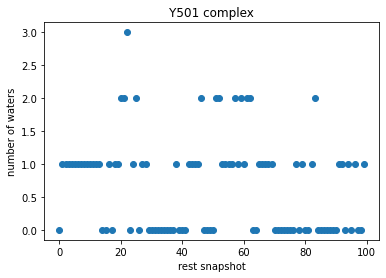

In [73]:
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501 complex")

In [74]:
y501_waters = [len(frame) for frame in neighbors]
timeseries.statisticalInefficiency(y501_waters)


3.510932475884243

## Y501 complex (15/150)

In [75]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/150/"
i = 150
phase = 'complex'
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))

In [76]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_solvent = make_traj(outdir, htf, i, phase, name, endstate, is_old, keep_solvent=True)

/scratch/lsftmp/3182888.tmpdir/ipykernel_40087/965879479.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [5]:
# traj_rest_solvent.save(os.path.join(outdir, f"{i}_{phase}_Y501_rest.dcd"))
# traj_rest_solvent[0].save(os.path.join(outdir, f"{i}_{phase}_Y501_rest.pdb"))

In [77]:
tyr_atoms = []
for atom in traj_rest_solvent.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        if atom.name == 'OH':
            print(atom, atom.residue.resSeq, atom.index)
            tyr_atoms.append(atom.index)

TYR501-OH 501 2620


In [78]:
water_atoms = traj_rest_solvent.topology.select("water and symbol == 'O'")

In [79]:
neighbors = md.compute_neighbors(traj_rest_solvent, 0.5, tyr_atoms, haystack_indices=water_atoms)

Text(0.5, 1.0, 'Y501 complex')

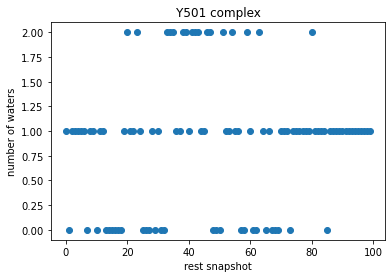

In [80]:
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501 complex")

In [81]:
y501_waters = [len(frame) for frame in neighbors]
timeseries.statisticalInefficiency(y501_waters)


2.516716145238639

## Y501 complex (24/1)

In [60]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/24/1/"
i = 1
phase = 'complex'
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))

In [61]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_solvent = make_traj(outdir, htf, i, phase, name, endstate, is_old, keep_solvent=True)

/scratch/lsftmp/3182888.tmpdir/ipykernel_40087/965879479.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [62]:
traj_rest_solvent.save(os.path.join(outdir, f"{i}_{phase}_Y501_rest_notimaged.dcd"))
traj_rest_solvent[0].save(os.path.join(outdir, f"{i}_{phase}_Y501_rest_notimaged.pdb"))

In [63]:
tyr_atoms = []
for atom in traj_rest_solvent.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        if atom.name == 'OH':
            print(atom, atom.residue.resSeq, atom.index)
            tyr_atoms.append(atom.index)

TYR501-OH 501 2620


In [64]:
water_atoms = traj_rest_solvent.topology.select("water and symbol == 'O'")

In [65]:
neighbors = md.compute_neighbors(traj_rest_solvent, 0.5, tyr_atoms, haystack_indices=water_atoms)

Text(0.5, 1.0, 'Y501 complex')

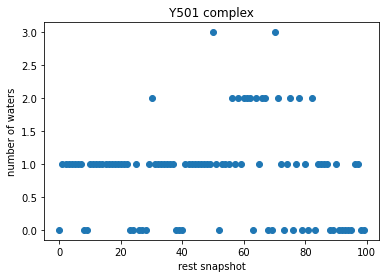

In [66]:
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501 complex")

In [67]:
y501_waters = [len(frame) for frame in neighbors]
timeseries.statisticalInefficiency(y501_waters)


2.8913344316309715

## Y501 complex (24/2)

In [36]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/24/2/"
i = 2
phase = 'complex'
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))

In [52]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_solvent = make_traj(outdir, htf, i, phase, name, endstate, is_old, keep_solvent=True)

/scratch/lsftmp/3182888.tmpdir/ipykernel_40087/965879479.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [53]:
traj_rest_solvent.save(os.path.join(outdir, f"{i}_{phase}_Y501_rest_notimaged.dcd"))
traj_rest_solvent[0].save(os.path.join(outdir, f"{i}_{phase}_Y501_rest_notimaged.pdb"))

In [54]:
tyr_atoms = []
for atom in traj_rest_solvent.topology.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        if atom.name == 'OH':
            print(atom, atom.residue.resSeq, atom.index)
            tyr_atoms.append(atom.index)

TYR501-OH 501 2620


In [55]:
water_atoms = traj_rest_solvent.topology.select("water and symbol == 'O'")

In [56]:
neighbors = md.compute_neighbors(traj_rest_solvent, 0.5, tyr_atoms, haystack_indices=water_atoms)

Text(0.5, 1.0, 'Y501 complex')

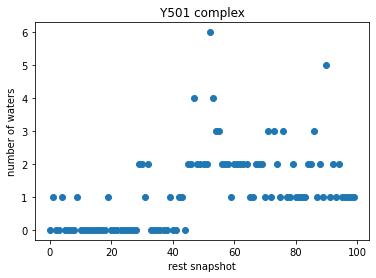

In [57]:
# not imaged
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501 complex")

In [58]:
y501_waters = [len(frame) for frame in neighbors]
timeseries.statisticalInefficiency(y501_waters)


13.811428571428578

Text(0.5, 1.0, 'Y501 complex')

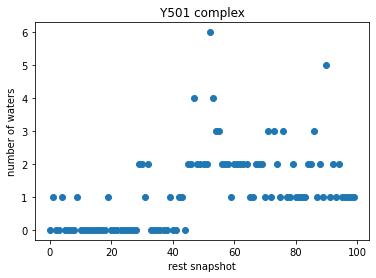

In [59]:
# imaged
plt.scatter(range(len(neighbors)), [len(frame) for frame in neighbors])
plt.ylabel("number of waters")
plt.xlabel("rest snapshot")
plt.title("Y501 complex")

In [43]:
y501_waters = [len(frame) for frame in neighbors]
timeseries.statisticalInefficiency(y501_waters)


3.5569829683698297

In [50]:
traj_rest_solvent.xyz.shape[1]

185384